In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [49]:
dfinside1 = pd.read_csv('Weather_AQI_inside5.csv')
dfinside2 = pd.read_csv('others_insidedata.csv')
useful_inside1 = dfinside1[1:]
useful_inside2 = dfinside2[1:]
display(dfinside1)
display(dfinside2)

,Time,Temp,Gas,Humidity,Pressure,Alt,PM 1.0,PM 2.5,PM 10
0,1.740179e+09,33.143867,51853,100.000000,702.877454,2980.424989,1,1,2
1,1.740179e+09,23.652266,23003,38.585995,1010.341255,24.245483,1,1,1
2,1.740179e+09,23.630977,36499,38.519166,1010.338508,24.268409,1,1,1
3,1.740179e+09,23.624727,46203,38.436305,1010.338964,24.264606,1,1,1
4,1.740179e+09,23.629219,52662,38.336989,1010.337423,24.277462,0,1,1
...,...,...,...,...,...,...,...,...,...
295,1.740179e+09,23.907930,153969,36.416951,1010.291429,24.661294,1,1,1
296,1.740179e+09,23.911641,154533,36.417318,1010.293912,24.640576,1,1,1
297,1.740179e+09,23.916133,154959,36.411964,1010.292364,24.653490,1,1,1
298,1.740179e+09,23.919844,154675,36.400735,1010.286020,24.706432,0,1,1


,time,PM1,PM2.5,PM10,BM680 Temp,BM680 Gas,BM680 Humidity,BM680 Pressure,BM680 Altitude
0,2 / 21 / 2025,1,1,1,33.391914,38724,100.000000,766.566308,2292.229678
1,2 / 21 / 2025,0,0,0,24.136250,10703,36.792288,1010.270393,24.836849
2,2 / 21 / 2025,0,0,0,24.071797,16223,36.708903,1010.280842,24.749647
3,2 / 21 / 2025,0,0,0,24.031562,21225,36.598417,1010.283537,24.727156
4,2 / 21 / 2025,0,0,0,24.008711,27159,36.460202,1010.297098,24.613987
...,...,...,...,...,...,...,...,...,...
295,2 / 21 / 2025,0,1,1,24.185273,214065,34.358803,1010.290711,24.667284
296,2 / 21 / 2025,0,1,1,24.186250,212620,34.370553,1010.301434,24.577802
297,2 / 21 / 2025,0,1,1,24.186836,213012,34.370608,1010.296847,24.616080
298,2 / 21 / 2025,1,2,2,24.187812,212099,34.370701,1010.303896,24.557254


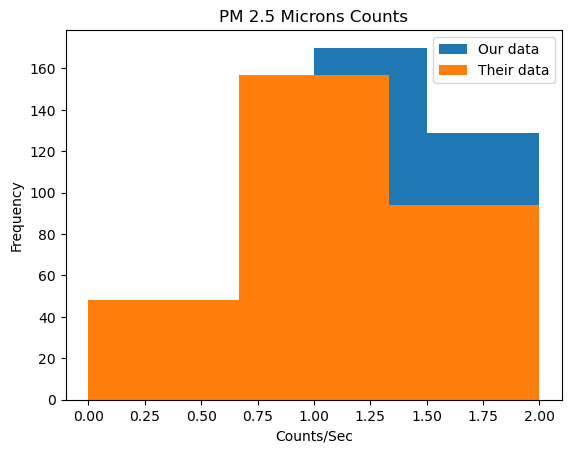

In [3]:
plt.hist(dfinside1["PM 2.5"],bins=2,label="Our data")
plt.hist(dfinside2["PM2.5"],bins=3,label="Their data")
plt.xlabel("Counts/Sec")
plt.title("PM 2.5 Microns Counts") 
plt.ylabel("Frequency")
plt.legend()
plt.show()

This, and the other PM data, doesn't have enough data, doesn't look Gaussian, won't have central limit theorem apply

In [59]:
def mean_uncertainty(data):
    return np.std(data)/np.sqrt(len(data))

In [69]:
mean1uncertainty= mean_uncertainty(useful_inside1['PM 2.5'])

inside1_mean = np.mean(useful_inside1['PM 2.5'])
inside2_mean = np.mean(useful_inside2["PM2.5"])

num_mean_std_away = np.abs(inside2_mean-inside1_mean)/mean1uncertainty
print("Num mean std away:", num_mean_std_away)

Num mean std away: 9.691575217009802


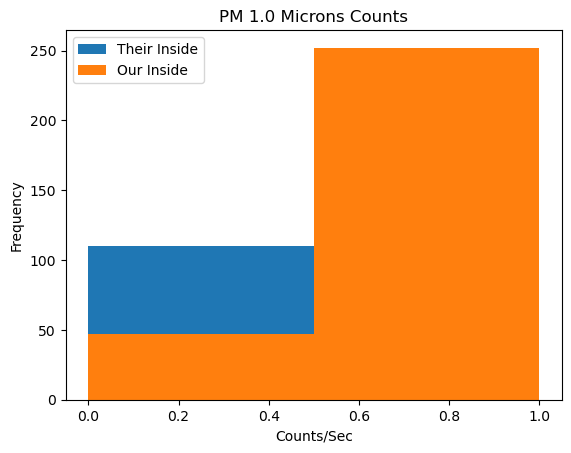

In [21]:
plt.hist(dfinside2["PM1"],bins=2,label="Their Inside")
plt.hist(dfinside1["PM 1.0"],bins=2,label="Our Inside")
plt.xlabel("Counts/Sec")
plt.title("PM 1.0 Microns Counts") 
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [73]:
mean1uncertainty= mean_uncertainty(useful_inside1['PM 1.0'])

inside1_mean = np.mean(useful_inside1['PM 1.0'])
inside2_mean = np.mean(useful_inside2["PM1"])

num_mean_std_away = np.abs(inside2_mean-inside1_mean)/mean1uncertainty
print("Num mean std away:", num_mean_std_away)

Num mean std away: 10.0098355885917


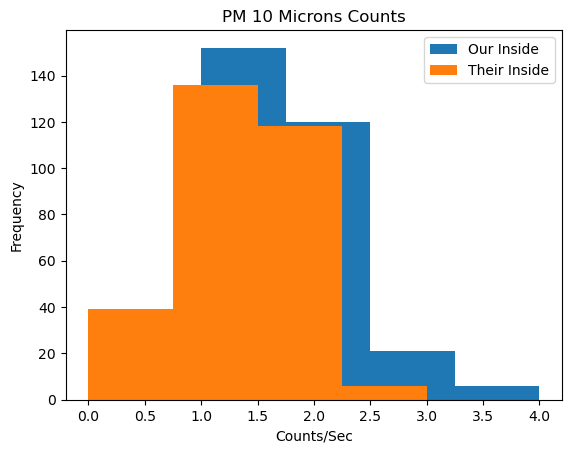

In [23]:
plt.hist(dfinside1["PM 10"],bins=4,label="Our Inside")
plt.hist(dfinside2["PM10"],bins=4,label="Their Inside")
plt.xlabel("Counts/Sec")
plt.title("PM 10 Microns Counts") 
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [75]:
mean1uncertainty= mean_uncertainty(useful_inside1['PM 10'])

inside1_mean = np.mean(useful_inside1['PM 10'])
inside2_mean = np.mean(useful_inside2["PM10"])

num_mean_std_away = np.abs(inside2_mean-inside1_mean)/mean1uncertainty
print("Num mean std away:", num_mean_std_away)

Num mean std away: 7.275584751507991


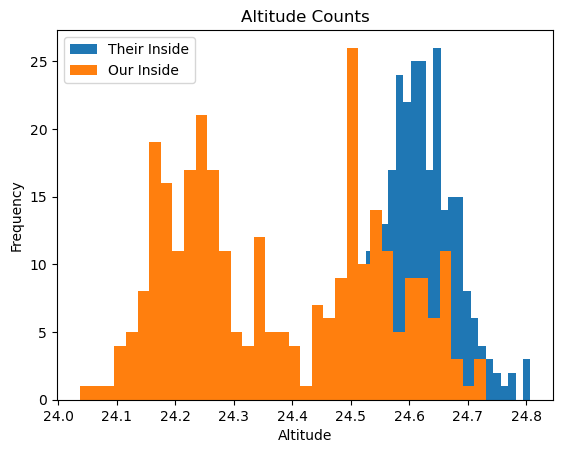

In [25]:
plt.hist((dfinside2["BM680 Altitude"])[1:],bins=31,label="Their Inside")
plt.hist((dfinside1["Alt"])[1:],bins=35,label="Our Inside")
plt.xlabel("Altitude")
plt.title("Altitude Counts") 
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [93]:
mean1uncertainty= mean_uncertainty(useful_inside1['Alt'])

inside1_mean = np.mean(useful_inside1['Alt'])
inside2_mean = np.mean(useful_inside2["BM680 Altitude"])

num_mean_std_away = np.abs(inside2_mean-inside1_mean)/mean1uncertainty
print("Num mean std away:", num_mean_std_away)


Num mean std away: 23.273213032942575


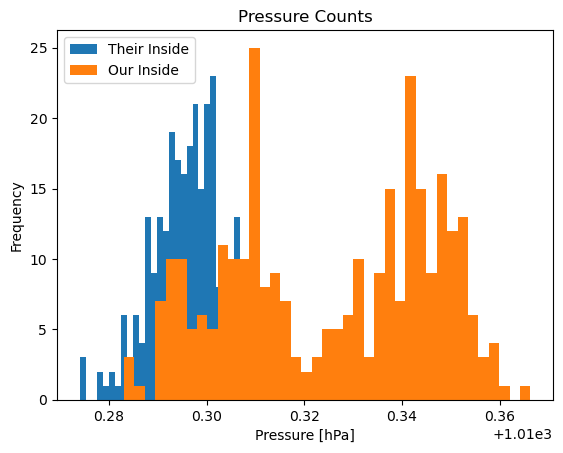

In [27]:
plt.hist((dfinside2["BM680 Pressure"])[1:],bins=39,label="Their Inside")
plt.hist((dfinside1["Pressure"])[1:],bins=39,label="Our Inside")
plt.xlabel("Pressure [hPa]")
plt.title("Pressure Counts") 
plt.ylabel("Frequency")
plt.legend()
plt.show()

The pressures look very significantly different, there is no overlap between outside and inside

In [97]:
mean1uncertainty= mean_uncertainty(useful_inside1['Pressure'])

inside1_mean = np.mean(useful_inside1['Pressure'])
inside2_mean = np.mean(useful_inside2["BM680 Pressure"])

num_mean_std_away = np.abs(inside2_mean-inside1_mean)/mean1uncertainty
print("Num mean std away:", num_mean_std_away)


Num mean std away: 23.273108316008795


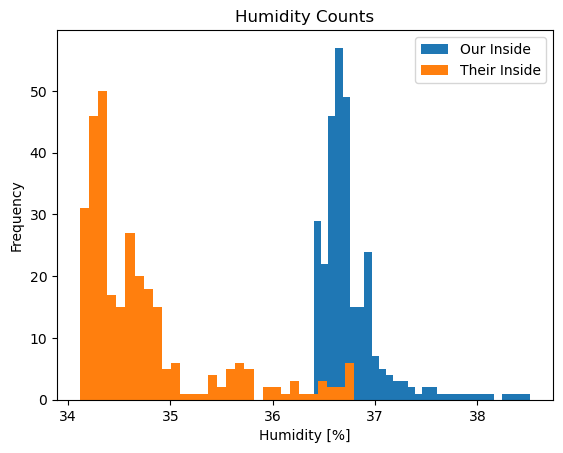

In [31]:
plt.hist((dfinside1["Humidity"])[1:],bins=30,label="Our Inside")
plt.hist((dfinside2["BM680 Humidity"])[1:],bins=30,label="Their Inside")
plt.xlabel("Humidity [%]")
plt.title("Humidity Counts") 
plt.ylabel("Frequency")
plt.legend()
plt.show()

The outside humidity has a much wider range of values, but it isn't clear if the means will be significantly different.

In [101]:
mean1uncertainty= mean_uncertainty(useful_inside2["BM680 Humidity"])

inside1_mean = np.mean(useful_inside1['Humidity'])
inside2_mean = np.mean(useful_inside2["BM680 Humidity"])

num_mean_std_away = np.abs(inside2_mean-inside1_mean)/mean1uncertainty
print("Num mean std away:", num_mean_std_away)


Num mean std away: 55.50874185068991


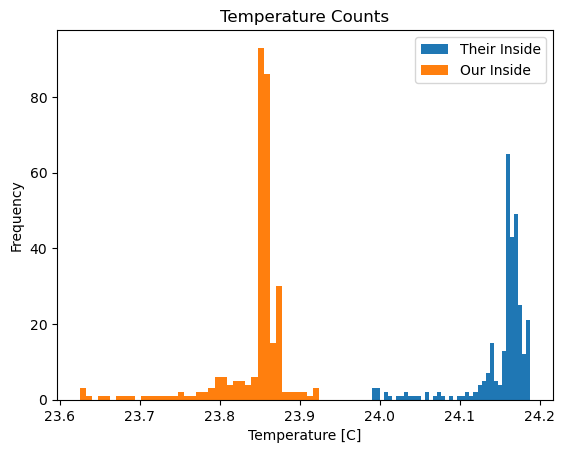

In [33]:
plt.hist((dfinside2["BM680 Temp"])[1:],bins=39,label="Their Inside")
plt.hist((dfinside1["Temp"])[1:],bins=39,label="Our Inside")
plt.xlabel("Temperature [C]")
plt.title("Temperature Counts") 
plt.ylabel("Frequency")
plt.legend()
plt.show()

The temperature counts are significantly different, but the outside temperature occupies a greater range of values, but does not overlap with inside.

In [103]:
mean1uncertainty= mean_uncertainty(useful_inside1["Temp"])

inside1_mean = np.mean(useful_inside1['Temp'])
inside2_mean = np.mean(useful_inside2["BM680 Temp"])

num_mean_std_away = np.abs(inside2_mean-inside1_mean)/mean1uncertainty
print("Num mean std away:", num_mean_std_away)


Num mean std away: 115.27991867160075


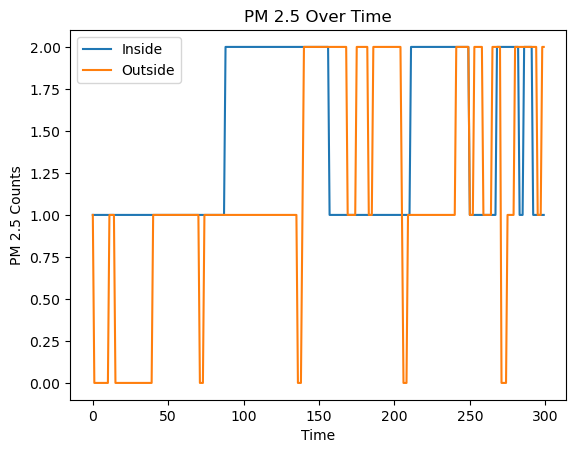

In [109]:
fig3 = plt.plot(dfinside1["PM 2.5"],label="Inside") 
plt.plot(dfinside2["PM2.5"],label="Outside")
plt.legend()
plt.title("PM 2.5 Over Time")
plt.xlabel("Time")
plt.ylabel("PM 2.5 Counts")
plt.show()

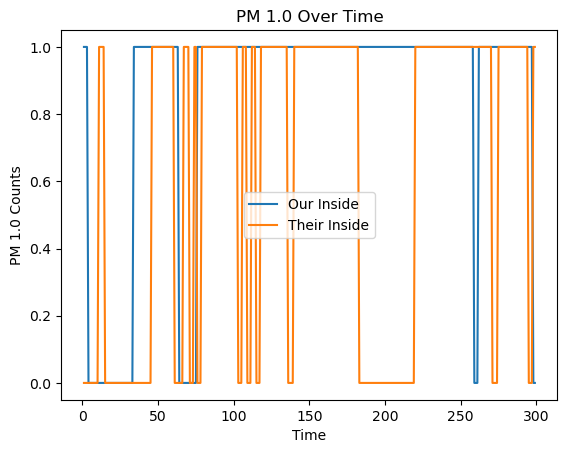

In [37]:
fig5 = plt.plot(dfinside1["PM 1.0"],label="Our Inside") 
plt.plot(dfinside2["PM1"],label="Their Inside")
plt.legend()
plt.title("PM 1.0 Over Time")
plt.xlabel("Time")
plt.ylabel("PM 1.0 Counts")
plt.show()

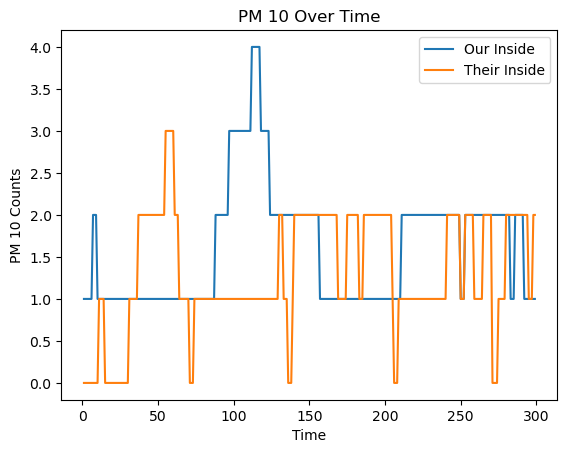

In [39]:
fig3 = plt.plot(dfinside1["PM 10"],label="Our Inside") 
plt.plot(dfinside2["PM10"],label="Their Inside")
plt.legend()
plt.title("PM 10 Over Time")
plt.xlabel("Time")
plt.ylabel("PM 10 Counts")
plt.show()

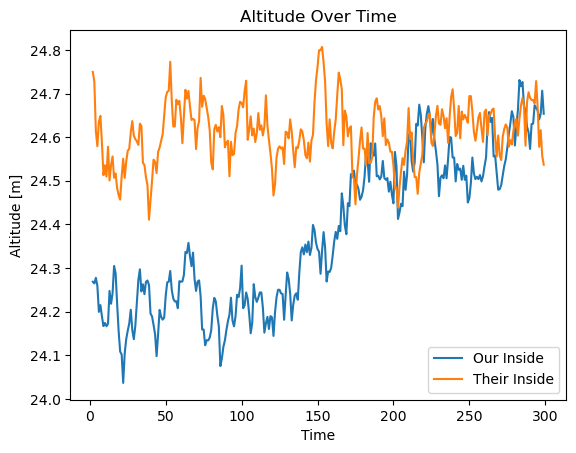

In [41]:
fig3 = plt.plot((dfinside1["Alt"])[1:],label="Our Inside") 
plt.plot((dfinside2["BM680 Altitude"])[1:],label="Their Inside")
plt.legend()
plt.title("Altitude Over Time")
plt.xlabel("Time")
plt.ylabel("Altitude [m]")
plt.show()

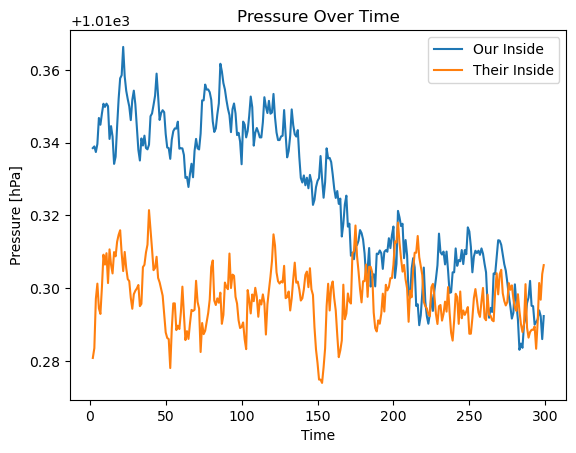

In [43]:
fig4 = plt.plot((dfinside1["Pressure"])[1:],label="Our Inside") 
plt.plot((dfinside2["BM680 Pressure"])[1:],label="Their Inside")
plt.legend()
plt.title("Pressure Over Time")
plt.xlabel("Time")
plt.ylabel("Pressure [hPa]")
plt.show()

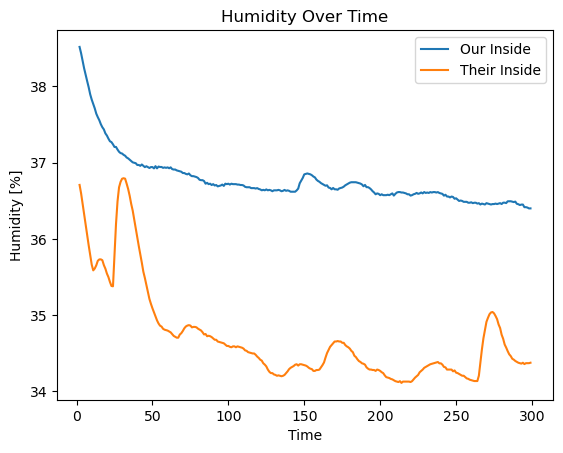

In [45]:
fig4 = plt.plot((dfinside1["Humidity"])[1:],label="Our Inside") 
plt.plot((dfinside2["BM680 Humidity"])[1:],label="Their Inside")
plt.legend()
plt.title("Humidity Over Time")
plt.xlabel("Time")
plt.ylabel("Humidity [%]")
plt.show()

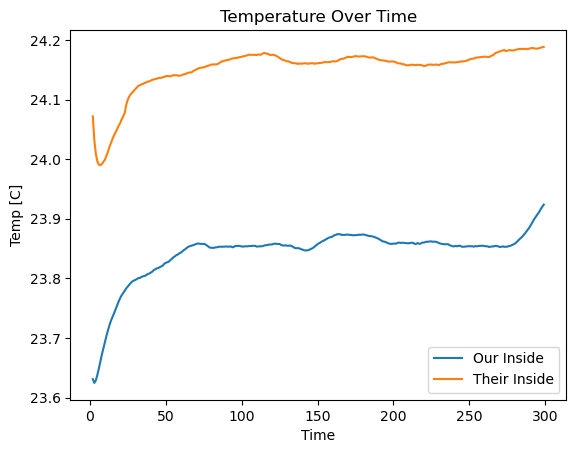

In [47]:
fig4 = plt.plot((dfinside1["Temp"])[1:],label="Our Inside") 
plt.plot((dfinside2["BM680 Temp"])[1:],label="Their Inside")
plt.legend()
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temp [C]")
plt.show()